# 04-2 확률적 경사 하강법

점진적 학습(온라인 학습) : 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 것

확률적 경사 하강법은 대표적인 점진적 학습 알고리즘!

**확률적 경사 하강법(SGD, Stochastic Gradient Descent)** : 훈련세트에서 랜덤한 하나의 샘플을 사용해 경사 하강법을 수행하는 것

미니배치 경사 하강법(Minibatch Gradient Descent) : 훈련세트에서 랜덤한 여러 개의 샘플을 사용해 경사 하강법을 수행하는 것

배치 경사 하강법(Batch Gradient Descent) : 훈련세트에서 전체 샘플을 사용해 경사 하강법을 수행하는 것. 가장 안정적이지만 많은 컴퓨터 자원을 사용함.

에포크(epoch) : 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정

**손실 함수(loss function)** : 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준 => 값이 작을수록 좋음

손실함수의 평가 기준은 연속적이어야 됨 => 미분 가능한 함수 => 분류의 측정지표로 이용되는 정확도는 사용 불가

이진 분류 > 로지스틱 손실 함수(logistic loss function), 이진 크로스엔트로피 손실 함수(binary cross-entropy loss function)

다중 분류 > 크로스엔트로피 손실 함수(cross-entropy loss function)

회귀 > 평균 절댓값 오차, 평균 제곱 오차 => 측정 지표와 손실 함수가 같음

데이터 전처리

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

**SGDClassifier** : 확률적 경사 하강법의 분류 알고리즘

미니배치나 배치는 지원하지 않음

In [5]:
from sklearn.linear_model import SGDClassifier

In [6]:
# loss : 로지스틱 함수를 지정. default)hinge. log는 로지스틱 회귀 모델 훈련을 의미함
# max_iter : epoch 지정.  default)1000
# penalty : 규제의 종류 지정. default) l2(L2)
# alpha : 규제 강도 지정. default)0.0001
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(loss='log', max_iter=10, random_state=42)

In [7]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


fit() : 이전 내용과 상관없이 완전히 새로 학습

parital_fit() : 이전 내용을 유지하면서 다시 학습 => 정확도를 높일 수 있음

In [8]:
sc.partial_fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [9]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


에포크의 과대/과소 적합

적은 에포크 횟수 동안 훈련한 모델은 훈련 세트와 테스트 세트에 잘 맞지 않는 과소적합된 모델일 가능성 높음

많은 에포크 횟수 동안 훈련한 모델은 훈련 세트에 너무 잘 맞아 테스트 세트에는 오히려 점수가 나쁜 과대적합된 모델일 가능성 높음

훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가하지만, 테스트 세트 점수는 어느 순간 감소하기 시작함. 이 지점이 과대적합되기 시작하는 곳!



조기 종류(early stopping) : 과대적합이 시작되기 전에 훈련을 멈추는 것

In [15]:
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []

In [16]:
# fit()을 사용하지 않고 partial_fit()만 쓰는 경우
# partial_fit()은 데이터의 일부분만 전달받기 때문에
# 훈련 세트에 있는 전체 클래스의 레이블을 classes 매개변수로 전달해줘야됨
import numpy as np
classes = np.unique(train_target)

for _ in range(300): # 300번의 에포크
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

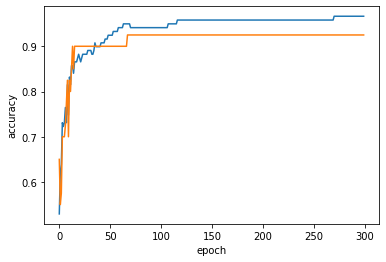

In [17]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

=> 적절한 에포크의 횟수는 100 정도

In [18]:
# SGDClassifier는 일정 에포크동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤
# tol은 향상될 최솟값을 지정
# tol=None으로 지정하면 무조건 max_iter만큼 수행
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


---

SGDClassifier의 loss 매개변수의 기본값은 'hinge'

hinge : 힌지 손실(hinge loss) 또는 서포트 벡터 머신(support vector machine)이라 불리는 머신러닝 알고리즘을 위한 손실 함수

In [19]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
